# DTEK0042 Exercise 3
    Group Members:
    1. Patrik Vahala
    2. Giulia Parisi
    3. Fairuz Bhuiyan

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

[[1.57253573e+09 1.09194000e+05 1.54836000e+05 5.07500000e+03]
 [1.57253573e+09 1.09190000e+05 1.54820000e+05 5.10700000e+03]
 [1.57253573e+09 1.09210000e+05 1.54852000e+05 5.07600000e+03]
 ...
 [1.57253606e+09 1.08492000e+05 1.57941000e+05 6.10700000e+03]
 [1.57253606e+09 1.08443000e+05 1.57922000e+05 6.09100000e+03]
 [1.57253606e+09 1.08431000e+05 1.57884000e+05 6.12900000e+03]]


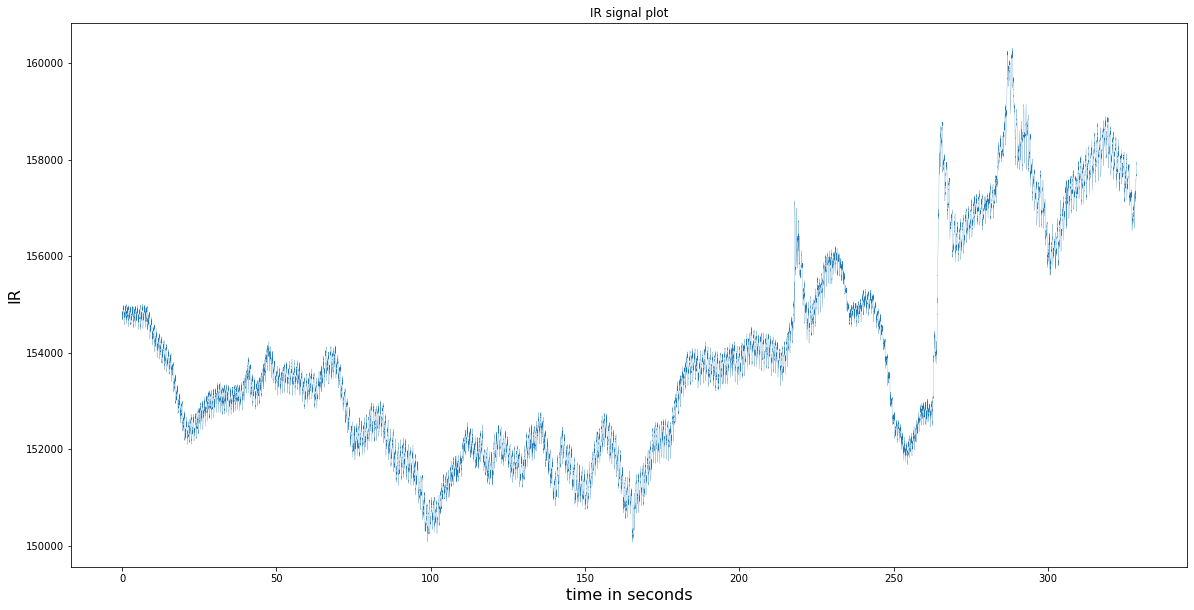

In [2]:
#code
PPG_data = np.loadtxt("PPG_record.txt", delimiter=",") #seperates each column off by ","
fs = 132 #sampling frequency
print(PPG_data) #to check the data

PPG_sig = PPG_data[:,2] #third column = IR data

time = np.linspace(0, len(PPG_sig)/fs, len(PPG_sig)) #seconds made to an array with sampling freq of 132hz.
plt.figure(figsize=(20,10))
plt.title("IR signal plot")
plt.xlabel("time in seconds",fontsize=16)
plt.ylabel("IR",fontsize=16)
plt.plot(time,PPG_sig,linewidth=0.2)
plt.show()

# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

PSD dominant frequency: [1.3]


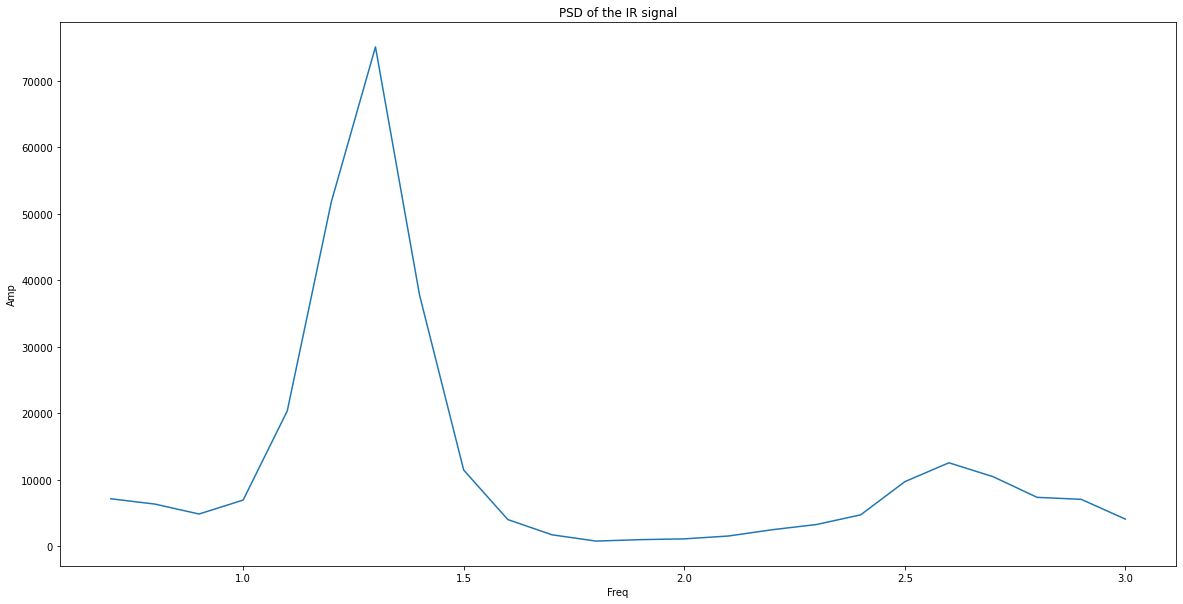

In [3]:
# code
import scipy.signal
PSD_freqs, PSD = scipy.signal.welch(PPG_sig, fs, nperseg=10*fs) #power spectral density, where nperseg = 10 * fs 
                                                                     #and fs(sampling frequency) is 132Hz

limited_PSD = np.where((PSD_freqs>=0.7)&(PSD_freqs<=3)) #power spectral density, where are only the frequencies between 0.7Hz 
                                                        #and 3Hz


#print(str(limited_PSD[0]))
PSD = PSD[7:31] #From previous print we can see that the values are from 7 to 30 so we set PSD to between those indexes

PSD_freqs = PSD_freqs[(PSD_freqs>=0.7) & (PSD_freqs<=3)]

plt.figure(figsize=(20,10))
plt.title("PSD of the IR signal")
plt.ylabel("Amp")
plt.xlabel("Freq")

plt.plot(PSD_freqs, PSD)

max_PSD = np.amax(PSD) #Return the maximum of an array or maximum along an axis.
dominant_freq = PSD_freqs[np.where(PSD==max_PSD)] #Find the dominand frequency of PSD
print('PSD dominant frequency: '+str(dominant_freq))

# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

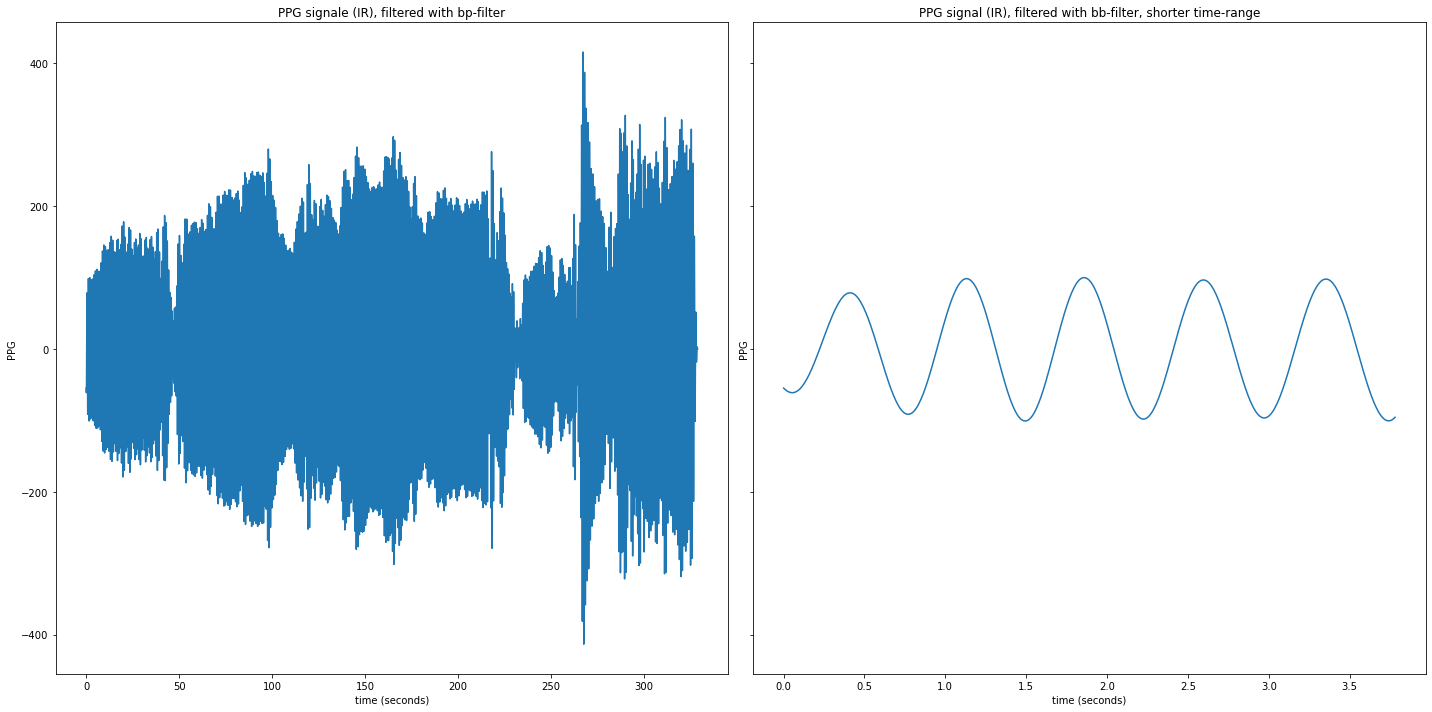

In [4]:
# code

from scipy.signal import butter, filtfilt, freqz

b, a = scipy.signal.butter(4, [dominant_freq-0.3, dominant_freq+0.3], 'bandpass', fs=132) #design the filter as bandpass 
PPG_filtered = scipy.signal.filtfilt(b, a, PPG_sig) #filter the original signal


#the code below is to plot the whole signal filtered and an enlargement of the same filtered signal in order to show
#the sinusoidal wave form.

fig, axes = plt.subplots(1,2, figsize=(20, 10), sharey=True)
x_data=[time, time[:500]]
y_data=[PPG_filtered, PPG_filtered[:500]]
titles=['PPG signale (IR), filtered with bp-filter', 'PPG signal (IR), filtered with bb-filter, shorter time-range']
xlabel='time (seconds)'
ylabel='PPG'

for i in range(2):
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)
    axes[i].plot(x_data[i], y_data[i])
    plt.tight_layout()

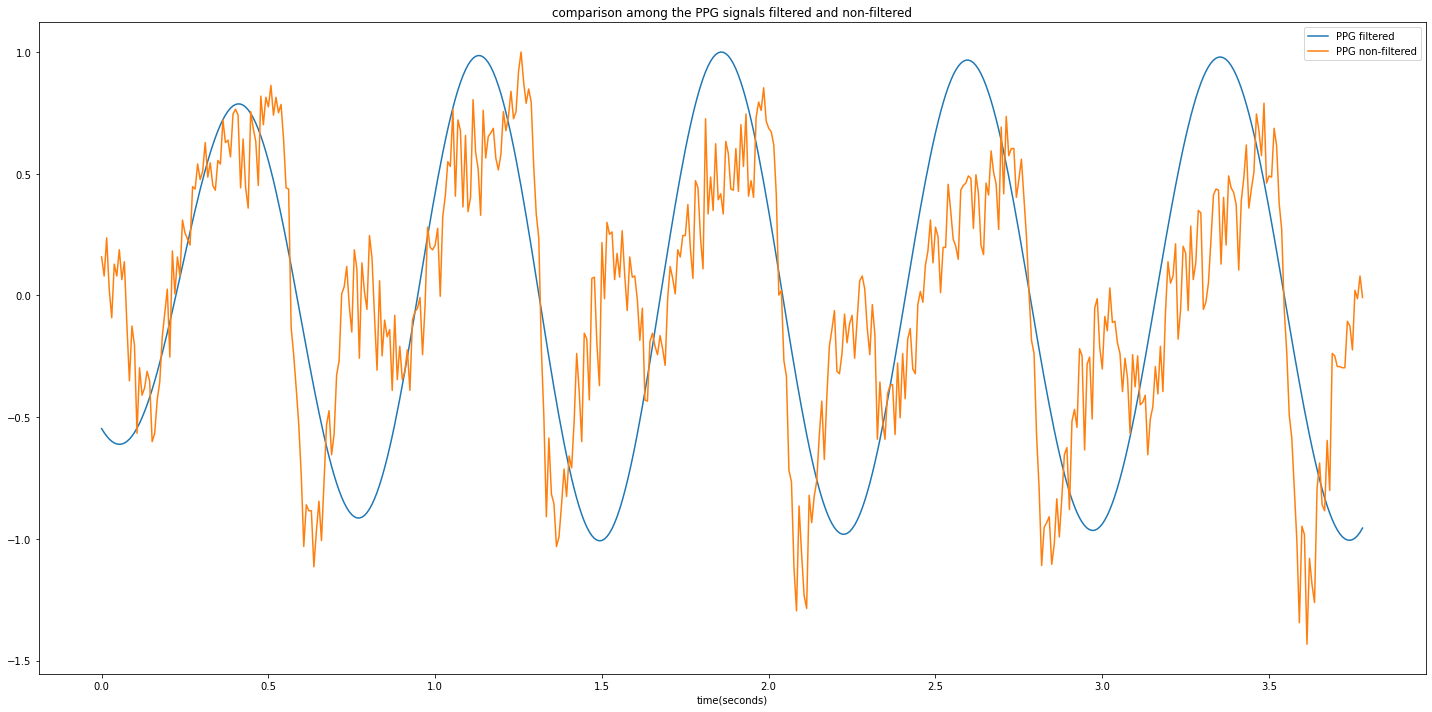

In [5]:
#we can also compare the original non-filtered signal with the filtered signal
#in order to compare the signals, we shift the row signal and normalize both of the signals

PPG_filtered_norm=PPG_filtered[:500]/max(PPG_filtered[:500]) #normalize the filtered signal
PPG_sig_shift_norm=(PPG_sig[:500]-np.mean(PPG_sig[:500]))/max(PPG_sig[:500]-np.mean(PPG_sig[:500])) #shift and normalize

plt.figure(figsize=(20,10))
plt.title('comparison among the PPG signals filtered and non-filtered')
plt.xlabel('time(seconds)')
plt.plot(time[:500], PPG_filtered_norm)
plt.plot(time[:500], PPG_sig_shift_norm)
plt.legend(['PPG filtered', 'PPG non-filtered'])
plt.tight_layout()

## Observations:
The filtered signal is much cleaner and thus clearer. The peaks are easy to point out. Filter works well and smoothens the plot a lot.

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

In [6]:
#code
from scipy.signal import argrelextrema

peaks=scipy.signal.argrelextrema(PPG_filtered, np.greater)[0]

RR_intervals=[]
for i in range(len(peaks)-1):
    RR_intervals.append(np.abs(peaks[i+1]-peaks[i]))

RR_intervals=np.array(RR_intervals)/fs #we convert the unit of measure in seconds
    
avg_peak_intervals=np.mean(RR_intervals)

In [7]:
HeartRate=60.0/avg_peak_intervals
HeartRate

78.44843111449747

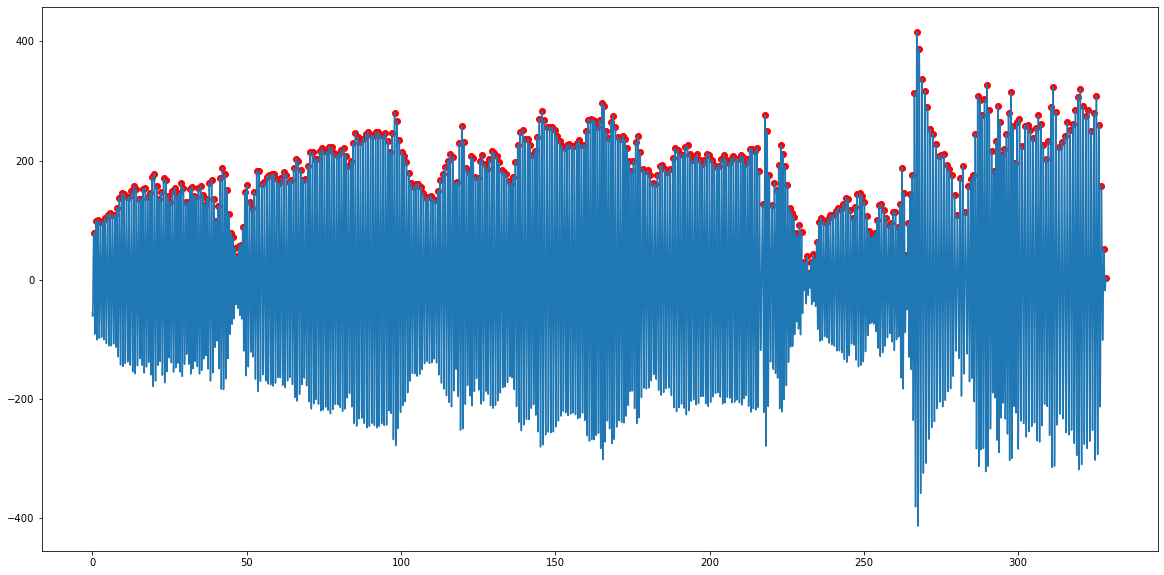

In [8]:
plt.figure(figsize=(20,10))
plt.plot(time, PPG_filtered)
plt.scatter(peaks/fs, PPG_filtered[peaks], color='r')
plt.show()

## Observations: 
Heartrate was around 78 bpm and since normal resting adult human heart rate is 60-100bbm this one is also O.K. The peaks can be seen from the graph above. 

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        

In [9]:
#code
RR_intervals_ms=np.array(RR_intervals)*1000 #we convert the unit of measure in milliseconds

AVNN=np.mean(RR_intervals_ms)
SDNN=np.std(RR_intervals_ms)

#implement te RMSSD formula

SD=np.diff(RR_intervals_ms)
RMSSD=np.sqrt(sum(SD**2)/(len(RR_intervals_ms)-1))

hrv_parameters={'AVNN':AVNN, 'SDNN': SDNN, 'RMSSD': RMSSD}

df = pd.DataFrame(data=hrv_parameters, index=[0])
df

,AVNN,SDNN,RMSSD
0,764.833651,64.584785,34.355389


## Observations:
The values obtained from our calculations seem OK. According to https://www.trainingpeaks.com/coach-blog/explaining-hrv-numbers-age/ the normal RMSSD should be around 25-80, and our calculations mark it as 34.  